In [31]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels
import statsmodels.api as sm
import seaborn as sns
import glob
import os
import sys
from scipy import stats
# import brokenaxes

colors = sns.color_palette("colorblind", 8)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Arial'})
plt.rcParams.update({'figure.figsize': '10,8'})
plt.rcParams.update({'lines.linewidth': 4})
plt.rcParams.update({'lines.markersize': 12})
plt.rcParams['axes.titlesize'] = 14

In [32]:
from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
import numpy as np
import sys
import math

In [33]:
color_palette_original = [
    "#003f5c",
    "#2f4b7c",
    "#665191",
    "#a05195",
    "#d45087",
    "#f95d6a",
    "#ff7c43",
    "#ffa600"
]


In [34]:
sumstats = pd.read_csv('../empirical/gnomad_repeatsamps/sumstats.tsv',sep='\t')
freqs_pos = pd.read_csv('../empirical/gnomad_repeatsamps/mean_freqs_high.tsv',sep='\t') 

In [35]:
filenames = glob.glob('../empirical/gnomad_repeatsamps/sfs_counts/*')
nfe_neutral = []
eur_neutral = []
nfe_high = []
eur_high = []
nfe_all = []
eur_all = []
for file in filenames:
    df = pd.read_csv(file,sep='\t')
    nfe_neutral.append(df['ac_nfe_counts_neutral'])
    eur_neutral.append(df['ac_eur_counts_neutral'])
    nfe_high.append(df['ac_nfe_counts_high'])
    eur_high.append(df['ac_eur_counts_high'])
    nfe_all.append(df['ac_nfe_counts_neutral']+df['ac_nfe_counts_high'])
    eur_all.append(df['ac_eur_counts_neutral']+df['ac_eur_counts_high'])

In [36]:
nfe_neutral

[0        30683012.0
 1         9254790.0
 2         3890695.0
 3         2137287.0
 4         1387233.0
             ...    
 9996        12718.0
 9997        15699.0
 9998        19929.0
 9999        26568.0
 10000       49315.0
 Name: ac_nfe_counts_neutral, Length: 10001, dtype: float64,
 0        30683133.0
 1         9247389.0
 2         3890404.0
 3         2138971.0
 4         1385399.0
             ...    
 9996        12361.0
 9997        15811.0
 9998        20241.0
 9999        26632.0
 10000       49072.0
 Name: ac_nfe_counts_neutral, Length: 10001, dtype: float64,
 0        30695676.0
 1         9255416.0
 2         3889289.0
 3         2139575.0
 4         1387324.0
             ...    
 9996        12731.0
 9997        15805.0
 9998        20122.0
 9999        26517.0
 10000       49138.0
 Name: ac_nfe_counts_neutral, Length: 10001, dtype: float64,
 0        30685312.0
 1         9252199.0
 2         3891822.0
 3         2138062.0
 4         1387067.0
             ...   

In [37]:
# nfe_high_list = [x.tolist() for x in nfe_high]
# eur_high_list = [x.tolist() for x in eur_high]

nfe_all_list = [x.tolist() for x in nfe_all]
eur_all_list = [x.tolist() for x in eur_all]

In [38]:
def get_zs(beta,Vp,n,a=1e-8):
    vs = 2*erfinv(1-a)**2
    return(0.5 - (0.5)*math.sqrt(1-(2*vs*(Vp/n))/((beta)**2)))

def get_etaell_empirical(emp_sfs,beta,n=10000):
    Vp = 1#Vg+Ve
    xstar = get_zs(beta,Vp,n,a=1e-8)
    upper_lim = math.floor(n*xstar)
    sum_total = 0
    sum_sfs = sum([0 if np.isnan(x) else x for x in emp_sfs])
    for i in range(upper_lim+1):
        if np.isnan(emp_sfs[i]):
            sum_total+=0
        else:
            sum_total+=emp_sfs[i]/sum_sfs
    result = 1 - min(sum_total,1)
#     print(result)
    return max(result,0)


def burden_ncp_empirical(mean,var,n,
               gamma=2,prop_cases=0.5,num_snps=100,num_assoc=100):
    num_cases = math.floor(prop_cases*n) # round to integer
    num_controls = n-num_cases
    ncp = np.sqrt((2*num_cases*num_controls)/(num_cases+num_controls))*(num_assoc/np.sqrt(num_snps))*(mean/(np.sqrt(var+mean-mean**2)))*(gamma-1)
    return ncp

def power_from_ncp(ncp,alpha,df=1):
    power = 1 - stats.ncx2.cdf(stats.chi2.ppf(1 - alpha, df=1), df=1, nc=ncp)
    return power

def power_all_burden_empirical(mean,var,n,gamma=2,prop_cases=0.1,num_snps=100,num_assoc=100,alpha=5e-8,df=1):
    ncp_temp = burden_ncp_empirical(mean,var,n,gamma=gamma,prop_cases=prop_cases,
                         num_snps=num_snps,num_assoc=num_assoc)
    power_temp = power_from_ncp(ncp_temp,alpha,df)
    return power_temp



In [39]:
beta = 0.1
nfe_pow_beta01 = [get_etaell_empirical(sfs_temp,beta) for sfs_temp in nfe_all_list]
eur_pow_beta01 = [get_etaell_empirical(sfs_temp,beta) for sfs_temp in eur_all_list]

beta = 1
nfe_pow_beta1 = [get_etaell_empirical(sfs_temp,beta) for sfs_temp in nfe_all_list]
eur_pow_beta1 = [get_etaell_empirical(sfs_temp,beta) for sfs_temp in eur_all_list]

beta = 10
nfe_pow_beta10 = [get_etaell_empirical(sfs_temp,beta) for sfs_temp in nfe_all_list]
eur_pow_beta10 = [get_etaell_empirical(sfs_temp,beta) for sfs_temp in eur_all_list]

In [40]:
L = 1000
n = 100000

g_list = [1.2,1.4,2]

ccratio=1e-3
pairs_nfe = sumstats.iloc[:, [1,6]].values
pairs_eur = sumstats.iloc[:, [4,7]].values

nfe_pow_gamma0 = [power_all_burden_empirical(pair[0],pair[1], n, prop_cases=ccratio, gamma=g_list[0],num_snps=L,num_assoc=L) for pair in pairs_nfe]
nfe_pow_gamma1 = [power_all_burden_empirical(pair[0],pair[1], n, prop_cases=ccratio, gamma=g_list[1],num_snps=L,num_assoc=L) for pair in pairs_nfe]
nfe_pow_gamma2 = [power_all_burden_empirical(pair[0],pair[1], n, prop_cases=ccratio, gamma=g_list[2],num_snps=L,num_assoc=L) for pair in pairs_nfe]


eur_pow_gamma0 = [power_all_burden_empirical(pair[0],pair[1], n, prop_cases=ccratio, gamma=g_list[0],num_snps=L,num_assoc=L) for pair in pairs_eur]
eur_pow_gamma1 = [power_all_burden_empirical(pair[0],pair[1], n, prop_cases=ccratio, gamma=g_list[1],num_snps=L,num_assoc=L) for pair in pairs_eur]
eur_pow_gamma2 = [power_all_burden_empirical(pair[0],pair[1], n, prop_cases=ccratio, gamma=g_list[2],num_snps=L,num_assoc=L) for pair in pairs_eur]

# pairs_eur

In [41]:
pairs_eur

array([[0.04269167, 0.02100609],
       [0.0426977 , 0.02100917],
       [0.04269547, 0.02100797],
       [0.04270997, 0.0210146 ],
       [0.04270391, 0.02101176],
       [0.04270328, 0.02101131],
       [0.04270621, 0.02101295],
       [0.04269749, 0.02100876],
       [0.04270203, 0.02101109],
       [0.04270205, 0.02101094],
       [0.04269517, 0.02100774],
       [0.04269335, 0.02100704],
       [0.0427029 , 0.02101141],
       [0.04269521, 0.02100786],
       [0.04269572, 0.02100807],
       [0.04269093, 0.02100575],
       [0.04270009, 0.02101016],
       [0.04269317, 0.02100669],
       [0.04269416, 0.02100745],
       [0.0426948 , 0.02100763]])

In [42]:
eur_pow_gamma1

[0.5351408148272343,
 0.5352198128267056,
 0.5351911561009923,
 0.5353880687399741,
 0.5353063689867954,
 0.5352992750134404,
 0.535336459281286,
 0.5352197265914644,
 0.5352792173550416,
 0.535280741193821,
 0.5351878726498217,
 0.5351620039339811,
 0.5352916259054465,
 0.5351874957722728,
 0.5351946030815906,
 0.5351308491331335,
 0.5352531014895396,
 0.5351620172367467,
 0.5351727302750627,
 0.5351823547418074]

In [43]:
data_list = [nfe_pow_beta01, eur_pow_beta01, nfe_pow_beta1, eur_pow_beta1, nfe_pow_beta10, eur_pow_beta10]
means = [np.mean(data) for data in data_list]
errors = [np.std(data,ddof=1) for data in data_list]

In [47]:
means

[4.773959005888173e-16,
 3.3861802251067273e-16,
 0.1332391909965535,
 0.2026258667298504,
 0.4928631582719628,
 0.8793232231431751]

In [44]:
data_list_burden = [nfe_pow_gamma0,eur_pow_gamma0,nfe_pow_gamma1,eur_pow_gamma1,nfe_pow_gamma2,eur_pow_gamma2]
means_burden = [np.mean(data) for data in data_list_burden]
errors_burden = [np.std(data,ddof=1) for data in data_list_burden]


In [45]:
means_burden

[0.1626630071553116,
 0.06249906631570595,
 0.8070360783448829,
 0.5352293147568079,
 0.9999971719895214,
 0.9995297988771294]

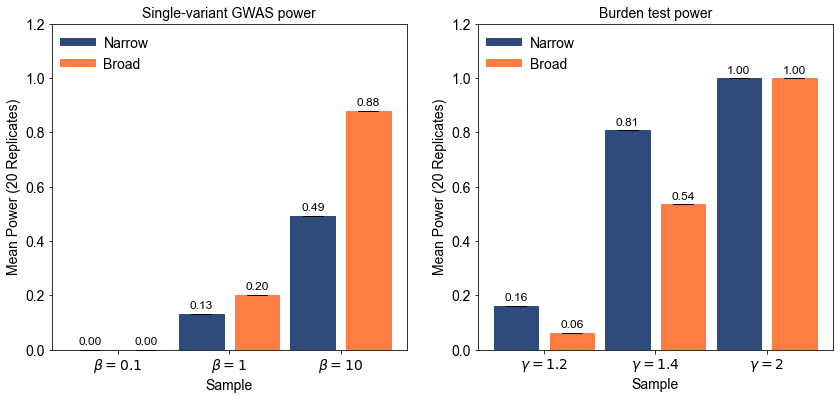

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
samps = [r'narrow, $\beta=0.1$', r'broad, $\beta=0.1$', r'narrow, $\beta=1$', r'broad, $\beta=1$', r'narrow, $\beta=10$', r'broad, $\beta=10$']
# means = [your_mean_values_here]
# errors = [your_error_values_here]

# Create a bar plot with alternating colors
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
bars = ax[0].bar(np.arange(len(samps)), means, yerr=errors, capsize=10, error_kw={'linewidth': 1.2}, align='center')

# Set colors based on "broad" or "narrow"
colors = [ color_palette_original[1] if 'narrow' in samp.lower() else color_palette_original[6] for samp in samps]

# Add labels for mean values on top of each bar with custom colors
for i, (bar, mean_value) in enumerate(zip(bars, means)):
    bar.set_color(colors[i])
    ax[0].annotate(f'{mean_value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=12, color='black')

# Add legend for bar colors
legend_labels = ['Narrow', 'Broad']
ax[0].legend(handles=[plt.Line2D([0], [0], color=color_palette_original[1], linewidth=8),
                      plt.Line2D([0], [0], color=color_palette_original[6], linewidth=8)],
            labels=legend_labels,frameon=False,loc='upper left')

# Label each pair of bars by beta
beta_labels = [r'$\beta=0.1$', r'$\beta=1$', r'$\beta=10$']
ax[0].set_xticks(np.arange(0, len(samps), 2))
ax[0].set_xticklabels([])  # Clear existing labels

# Calculate the center position for beta labels
center_positions = np.arange(0, len(samps), 2) + 0.5
ax[0].set_xticks(center_positions)
ax[0].set_xticklabels(beta_labels)

# Customize the plot
ax[0].set_ylabel('Mean Power (20 Replicates)')
ax[0].set_xlabel('Sample')
ax[0].tick_params(axis='x', rotation=0)
ax[0].set_title("Single-variant GWAS power")
ax[0].set_ylim(0,1.2)

samps = [r'narrow, $\gamma=1.2$', r'broad, $\gamma=1.2$', r'narrow, $\gamma=1.4$', r'broad, $\gamma=1.4$', r'narrow, $\beta=2$', r'broad, $\beta=2$']
bars = ax[1].bar(np.arange(len(samps)), means_burden, yerr=errors_burden, capsize=10, error_kw={'linewidth': 1.2}, align='center')

# Set colors based on "broad" or "narrow"
colors = [ color_palette_original[1] if 'narrow' in samp.lower() else color_palette_original[6] for samp in samps]

# Add labels for mean values on top of each bar with custom colors
for i, (bar, mean_value) in enumerate(zip(bars, means_burden)):
    bar.set_color(colors[i])
    ax[1].annotate(f'{mean_value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=12, color='black')

# Add legend for bar colors
legend_labels = ['Narrow', 'Broad']
ax[1].legend(handles=[plt.Line2D([0], [0], color=color_palette_original[1], linewidth=8),
                      plt.Line2D([0], [0], color=color_palette_original[6], linewidth=8)],
            labels=legend_labels,frameon=False,loc='upper left')

# Label each pair of bars by beta
beta_labels = [r'$\gamma=1.2$', r'$\gamma=1.4$', r'$\gamma=2$']
ax[1].set_xticks(np.arange(0, len(samps), 2))
ax[1].set_xticklabels([])  # Clear existing labels

# Calculate the center position for beta labels
center_positions = np.arange(0, len(samps), 2) + 0.5
ax[1].set_xticks(center_positions)
ax[1].set_xticklabels(beta_labels)

# Customize the plot
ax[1].set_ylabel('Mean Power (20 Replicates)')
ax[1].set_xlabel('Sample')
ax[1].tick_params(axis='x', rotation=0)
ax[1].set_title("Burden test power")
ax[1].set_ylim(0,1.2)

# Show the plot
plt.savefig("power_empirical_gnomad.pdf")

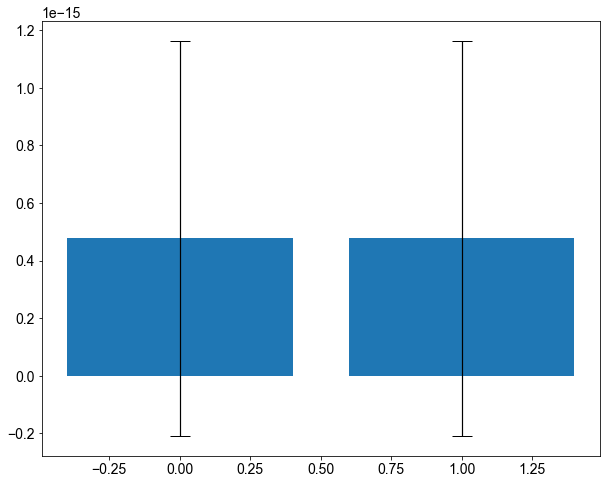

In [48]:
fig, ax = plt.subplots()
bars = ax.bar(np.arange(2), means[0:1], yerr=errors[0:1], capsize=10, error_kw={'linewidth': 1.2}, align='center')


[6.863751499891398e-16,
 2.801150000071654e-16,
 0.00020666406283563702,
 0.00023380828248312007,
 0.0001335244724881928,
 3.2442123236727266e-05]

<BarContainer object of 2 artists>

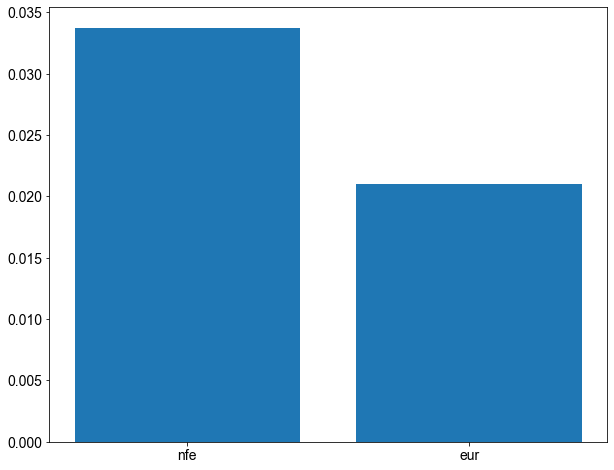

In [206]:
plt.bar(['nfe','eur'],[np.mean(sumstats['af_var_nfe']),np.mean(sumstats['af_var_eur'])])

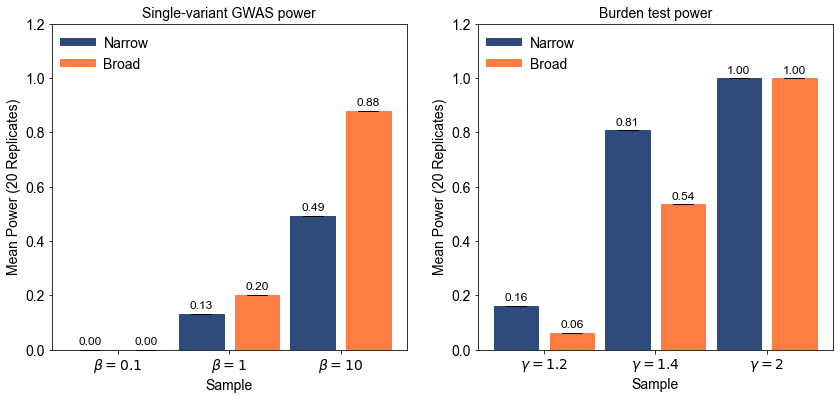

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
samps = [r'narrow, $\beta=0.1$', r'broad, $\beta=0.1$', r'narrow, $\beta=1$', r'broad, $\beta=1$', r'narrow, $\beta=10$', r'broad, $\beta=10$']
# means = [your_mean_values_here]
# errors = [your_error_values_here]

# Create a bar plot with alternating colors
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
bars = ax[0].bar(np.arange(len(samps)), means, yerr=errors, capsize=10, error_kw={'linewidth': 1.2}, align='center')

# Set colors based on "broad" or "narrow"
colors = [ color_palette_original[1] if 'narrow' in samp.lower() else color_palette_original[6] for samp in samps]

# Add labels for mean values on top of each bar with custom colors
for i, (bar, mean_value) in enumerate(zip(bars, means)):
    bar.set_color(colors[i])
    ax[0].annotate(f'{mean_value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=12, color='black')

# Add legend for bar colors
legend_labels = ['Narrow', 'Broad']
ax[0].legend(handles=[plt.Line2D([0], [0], color=color_palette_original[1], linewidth=8),
                      plt.Line2D([0], [0], color=color_palette_original[6], linewidth=8)],
            labels=legend_labels,frameon=False,loc='upper left')

# Label each pair of bars by beta
beta_labels = [r'$\beta=0.1$', r'$\beta=1$', r'$\beta=10$']
ax[0].set_xticks(np.arange(0, len(samps), 2))
ax[0].set_xticklabels([])  # Clear existing labels

# Calculate the center position for beta labels
center_positions = np.arange(0, len(samps), 2) + 0.5
ax[0].set_xticks(center_positions)
ax[0].set_xticklabels(beta_labels)

# Customize the plot
ax[0].set_ylabel('Mean Power (20 Replicates)')
ax[0].set_xlabel('Sample')
ax[0].tick_params(axis='x', rotation=0)
ax[0].set_title("Single-variant GWAS power")
ax[0].set_ylim(0,1.2)

samps = [r'narrow, $\gamma=1.2$', r'broad, $\gamma=1.2$', r'narrow, $\gamma=1.4$', r'broad, $\gamma=1.4$', r'narrow, $\beta=2$', r'broad, $\beta=2$']
bars = ax[1].bar(np.arange(len(samps)), means_burden, yerr=errors_burden, capsize=10, error_kw={'linewidth': 1.2}, align='center')

# Set colors based on "broad" or "narrow"
colors = [ color_palette_original[1] if 'narrow' in samp.lower() else color_palette_original[6] for samp in samps]

# Add labels for mean values on top of each bar with custom colors
for i, (bar, mean_value) in enumerate(zip(bars, means_burden)):
    bar.set_color(colors[i])
    ax[1].annotate(f'{mean_value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=12, color='black')

# Add legend for bar colors
legend_labels = ['Narrow', 'Broad']
ax[1].legend(handles=[plt.Line2D([0], [0], color=color_palette_original[1], linewidth=8),
                      plt.Line2D([0], [0], color=color_palette_original[6], linewidth=8)],
            labels=legend_labels,frameon=False,loc='upper left')

# Label each pair of bars by beta
beta_labels = [r'$\gamma=1.2$', r'$\gamma=1.4$', r'$\gamma=2$']
ax[1].set_xticks(np.arange(0, len(samps), 2))
ax[1].set_xticklabels([])  # Clear existing labels

# Calculate the center position for beta labels
center_positions = np.arange(0, len(samps), 2) + 0.5
ax[1].set_xticks(center_positions)
ax[1].set_xticklabels(beta_labels)

# Customize the plot
ax[1].set_ylabel('Mean Power (20 Replicates)')
ax[1].set_xlabel('Sample')
ax[1].tick_params(axis='x', rotation=0)
ax[1].set_title("Burden test power")
ax[1].set_ylim(0,1.2)

# Show the plot
plt.savefig("power_empirical_gnomad.pdf")